#### 사운드 프로세싱
- 진폭(amplitude) A : 위 아래로 움직이는 폭, 소리의 크기로 인식
- 주파수(frequency) f : 진동 속도. 주파수가 높으면 빠르게 진동, 소리의 높낮이로 인식
- 위상(phase) : 사인 함수의 시작 시점, 위상만큼 출발이 늦어짐, 위상 차이는 소리의 시간차로 인식

In [1]:
%matplotlib inline

In [2]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

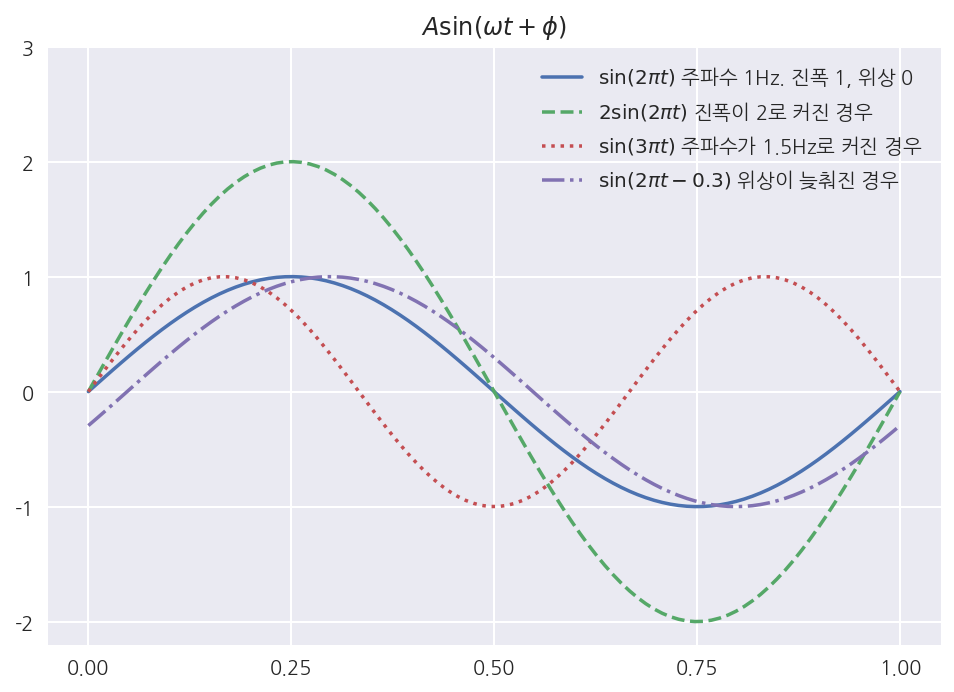

In [3]:
t = np.linspace(0, 1, 100)

plt.plot(t, 1 * np.sin(2 * np.pi * t + 0), ls="-", label=r"$\sin\left(2\pi{t}\right)$ 주파수 1Hz. 진폭 1, 위상 0")
plt.plot(t, 2 * np.sin(2 * np.pi * t + 0), ls="--", label=r"$2\sin\left(2\pi{t}\right)$ 진폭이 2로 커진 경우 ")
plt.plot(t, 1 * np.sin(3 * np.pi * t + 0), ls=":", label=r"$\sin\left(3\pi{t}\right)$ 주파수가 1.5Hz로 커진 경우")
plt.plot(t, 1 * np.sin(2 * np.pi * t - 0.3), ls="-.", label=r"$\sin\left(2\pi{t} - 0.3\right)$ 위상이 늦춰진 경우")
plt.ylim(-2.2, 3)
plt.xticks(np.linspace(0, 1, 5))
plt.legend()
plt.title(r"$A\sin\left(\omega{t}+\phi\right)$")
plt.show()

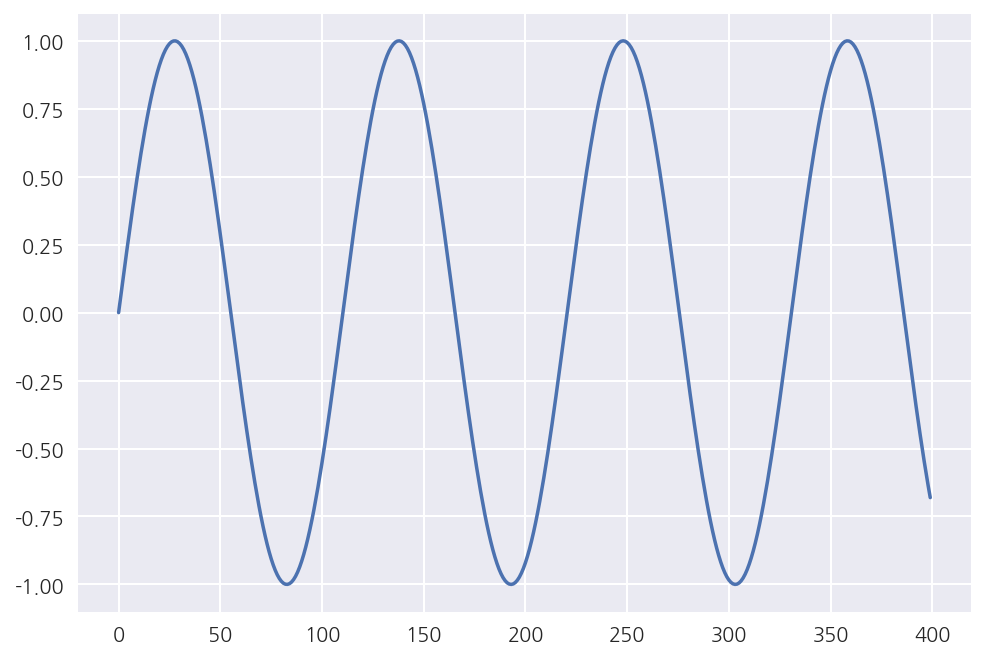

In [5]:
def single_tone(frequecy, sampling_rate=44100, duration=1):
    # frequency: 주파수
    # sampling_rate: 초당 샘플링 데이터 수. 디폴트 44100
    # duration: 지속 시간. 단위 초. 디폴트 1초
    t = np.linspace(0, duration, int(sampling_rate))
    y = np.sin(2 * np.pi * frequecy * t)
    return y

y = single_tone(400)

plt.plot(y[:400])
plt.show()

In [6]:
from IPython.display import Audio, display

display(Audio(y, rate=44100))

In [7]:
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 261.62 * 2**(np.arange(0, len(notes)) / 12.)
notes = list(zip(notes, freqs))
octave = np.hstack([single_tone(f) for f in freqs])
display(Audio(octave, rate=44100))

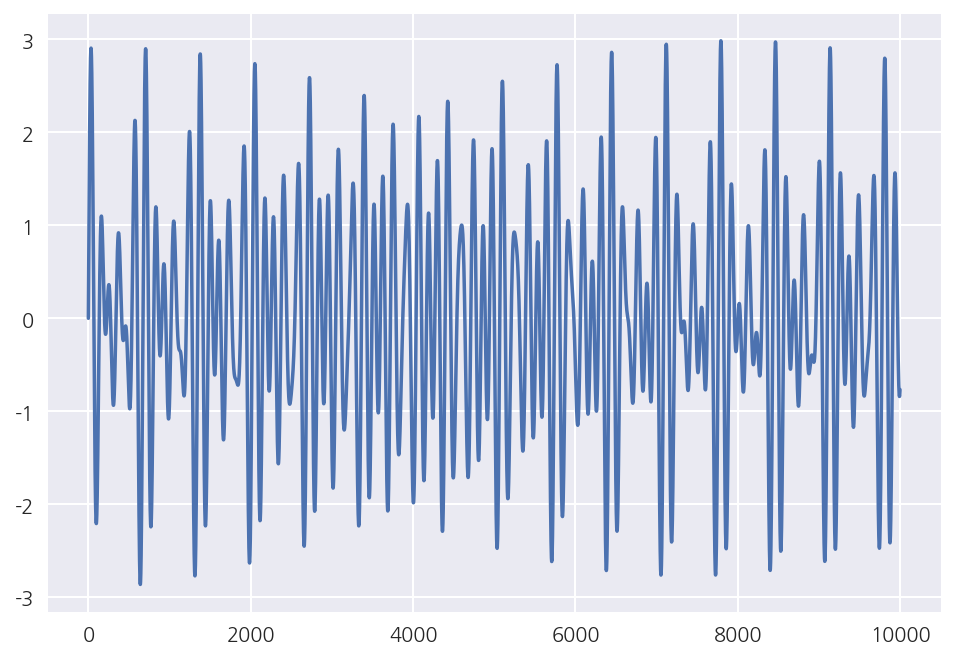

In [8]:
tone_C = single_tone(261.62)
tone_E = single_tone(329.62)
tone_G = single_tone(392)
harmony = tone_C + tone_E + tone_G

plt.plot(harmony[:10000])
plt.show()

In [9]:
display(Audio(harmony, rate=44100))

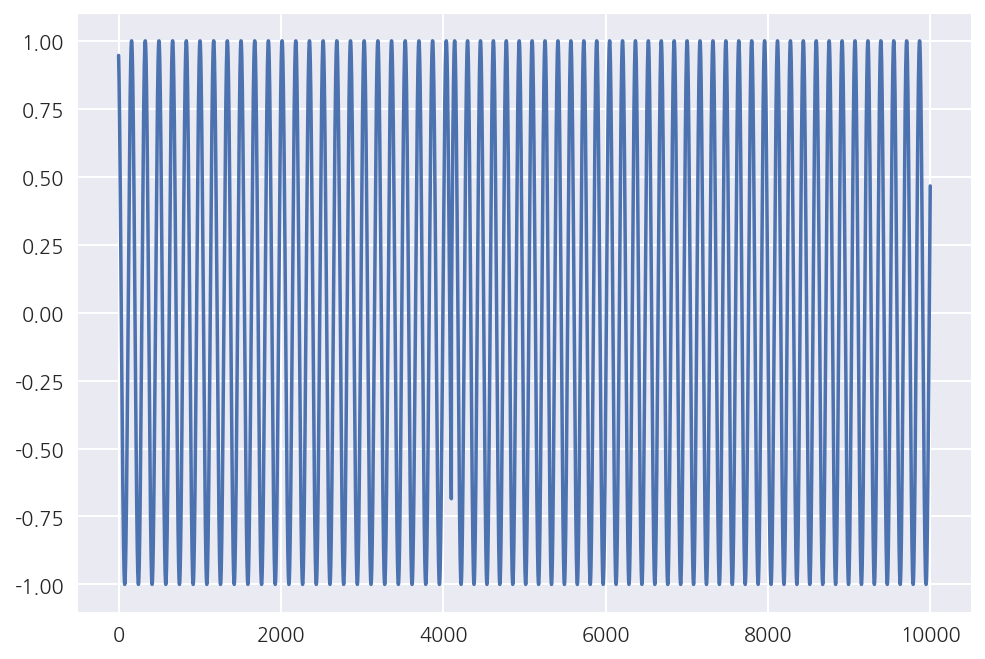

In [10]:
import scipy.io.wavfile

# 초당 샘플링 데이터 수 
sampling_rate = 44100
sp.io.wavfile.write("octave.wav", sampling_rate, octave)

sr, y_read = sp.io.wavfile.read("octave.wav")
# sr == sampling_rate

plt.plot(y_read[40000:50000])
plt.show()

In [11]:
Audio(y_read, rate=sr)